---
title: "빅리더 1주차 02일 크롤링"
author: "minstar"
date: "2023-06-27"
categories:
  - python
  - bigleader
---

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
#!pip install selenium

In [6]:
driver=webdriver.Chrome()

driver.get("http://www.opinet.co.kr")
driver.get("http://www.opinet.co.kr/searRgSelect.do")


# 시/도 입력을 위한 xpath 확인
area = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')



area.send_keys('서울')

In [7]:
# 구/데이터 입력을 위한 xpath 확인
gu_list_raw = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
# 구 리스트 확인 위해 find_elements_by_tag_name으로 option 태그 검색
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')

### 서울 주유소 가격 정보 비교

In [8]:
#value 속성을 이용하여 구 리스트 획득
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [9]:
#gu_names에서 리스트 첫번째 값 입력하여 테스트 진행
element = driver.find_element(By.ID, 'SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [10]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element(By.XPATH, xpath).click()

In [11]:
#엑셀 저장 버튼 클릭하여 엑셀 내용 저장 테스트
xpath = '''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element(By.XPATH, xpath).click()

### 구 별 주유소 가격 정리

In [13]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [14]:
import time
from tqdm import tqdm_notebook
# 반복문을 이용하여 모든 구 엑셀파일 다운로드 진행
for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)# 데이터 획득 위한 지연 시간
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)
    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element(By.XPATH, xpath).click()

    time.sleep(1)

/var/folders/cf/_pxyh8n15f71szpgtc0c4m6w0000gn/T/ipykernel_5366/3591970159.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

### 구별 주유 가격 정리

In [ ]:
#!pip install pandas

In [17]:
import pandas as pd
from glob import glob

In [23]:
# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장
stations_files = glob('data/지역*.xls')
stations_files

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

In [ ]:
#!pip install xlrd

In [26]:
# concat 명령으로 합쳐본다.
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [27]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      444 non-null    object
 1   상호      444 non-null    object
 2   주소      444 non-null    object
 3   상표      444 non-null    object
 4   전화번호    444 non-null    object
 5   셀프여부    444 non-null    object
 6   고급휘발유   444 non-null    object
 7   휘발유     444 non-null    int64 
 8   경유      444 non-null    int64 
 9   실내등유    444 non-null    object
dtypes: int64(2), object(8)
memory usage: 38.2+ KB


### 구별 주유 가격 정리

In [28]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),현대오일뱅크,02-2216-7155,Y,1740,1509,1329,-
1,서울특별시,풍한주유소,서울 동대문구 안암로 168,SK에너지,02-924-5189,N,-,1515,1335,-
2,서울특별시,열린주유소,서울 동대문구 한천로 263 (휘경동),S-OIL,02-2215-6543,N,-,1527,1329,-
3,서울특별시,재정제2주유소,서울 동대문구 사가정로 90 (전농동),현대오일뱅크,02-2249-6682,Y,-,1530,1350,-
4,서울특별시,재정주유소,서울 동대문구 전농로 121 (전농동),현대오일뱅크,070-8256-4617,Y,1789,1530,1350,-


In [29]:
# 휘발유 데이터 저장.
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1509,Y,현대오일뱅크
1,풍한주유소,서울 동대문구 안암로 168,1515,N,SK에너지
2,열린주유소,서울 동대문구 한천로 263 (휘경동),1527,N,S-OIL
3,재정제2주유소,서울 동대문구 사가정로 90 (전농동),1530,Y,현대오일뱅크
4,재정주유소,서울 동대문구 전농로 121 (전농동),1530,Y,현대오일뱅크


In [30]:
#구 이름만 추출
stations['구'] = [eachAddress.split()[1]for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1509,Y,현대오일뱅크,동대문구
1,풍한주유소,서울 동대문구 안암로 168,1515,N,SK에너지,동대문구
2,열린주유소,서울 동대문구 한천로 263 (휘경동),1527,N,S-OIL,동대문구
3,재정제2주유소,서울 동대문구 사가정로 90 (전농동),1530,Y,현대오일뱅크,동대문구
4,재정주유소,서울 동대문구 전농로 121 (전농동),1530,Y,현대오일뱅크,동대문구


In [31]:
# unique() 이용해서 데이터 검사 수행
stations['구'].unique()

array(['동대문구', '서대문구', '관악구', '강북구', '서초구', '도봉구', '강동구', '영등포구', '중구',
       '성동구', '성북구', '중랑구', '용산구', '강남구', '은평구', '송파구', '양천구', '종로구',
       '동작구', '노원구', '금천구', '마포구'], dtype=object)

In [32]:
stations['가격'].unique() #가격에 '-'가 있음

array([1509, 1515, 1527, 1530, 1555, 1565, 1575, 1578, 1595, 1597, 1599,
       1640, 1648, 1534, 1539, 1544, 1559, 1569, 1579, 1588, 1624, 1564,
       1566, 1589, 1594, 1598, 1604, 1665, 1696, 1699, 1718, 1518, 1519,
       1537, 1548, 1549, 1627, 1567, 1585, 1586, 1587, 1596, 1603, 1609,
       1614, 1619, 1623, 1625, 1626, 1628, 1655, 1659, 1793, 1938, 1989,
       1491, 1524, 1529, 1547, 1561, 1563, 1568, 1543, 1584, 1605, 1629,
       1630, 1631, 1695, 1799, 1948, 1513, 1540, 1545, 1570, 1593, 1895,
       1898, 2050, 2110, 2199, 1798, 1819, 1998, 2246, 2359, 2595, 1535,
       1693, 1698, 1745, 1759, 1893, 1945, 2170, 1507, 1554, 1574, 1577,
       1995, 1999, 2019, 2021, 2195, 2217, 2585, 1582, 1615, 1660, 1684,
       1687, 1694, 1697, 1758, 1840, 1908, 1939, 1940, 2089, 2128, 2176,
       2188, 2275, 2355, 2398, 2578, 1495, 1557, 1573, 1610, 1613, 1678,
       1838, 1497, 1512, 1514, 1553, 1592, 1617, 1730, 2075, 2168, 2240,
       2250, 1560, 1765, 1525, 1658, 1638, 1639])

### 서울 주유소 가격 비교

In [33]:
#가격에 '-' 값만 추출
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구


In [34]:
# '-' 문자가 포함된 데이터 제외
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),1509,Y,현대오일뱅크,동대문구
1,풍한주유소,서울 동대문구 안암로 168,1515,N,SK에너지,동대문구
2,열린주유소,서울 동대문구 한천로 263 (휘경동),1527,N,S-OIL,동대문구
3,재정제2주유소,서울 동대문구 사가정로 90 (전농동),1530,Y,현대오일뱅크,동대문구
4,재정주유소,서울 동대문구 전농로 121 (전농동),1530,Y,현대오일뱅크,동대문구


### 서울 주유소 가격 정보 비교

In [35]:
# 가격 float 형 변환.
stations['가격'] = [float(value) for value in stations['가격']]

In [36]:
# reset_index 이용하여 index 재정의
stations.reset_index(inplace=True)
del stations['index']# 기존 인덱스 삭제

In [37]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  444 non-null    object 
 1   주소         444 non-null    object 
 2   가격         444 non-null    float64
 3   셀프         444 non-null    object 
 4   상표         444 non-null    object 
 5   구          444 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.9+ KB


### 시각화

In [ ]:
!pip install matplotlib
!pip install seaborn

In [40]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

### 시각화

<Axes: title={'center': '가격'}, xlabel='셀프'>

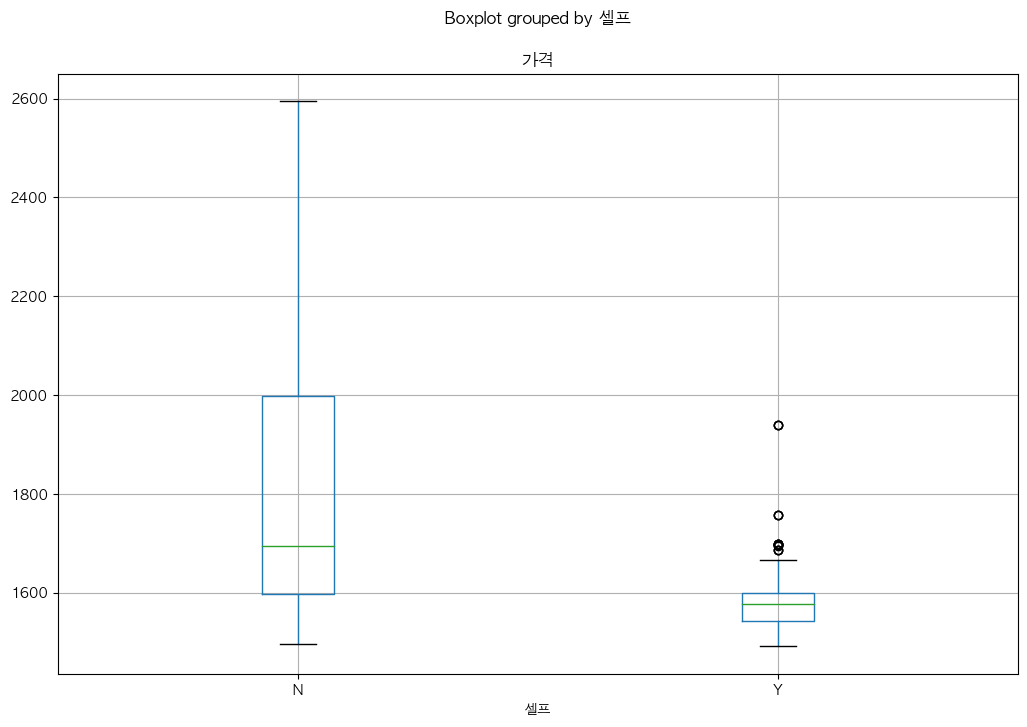

In [41]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

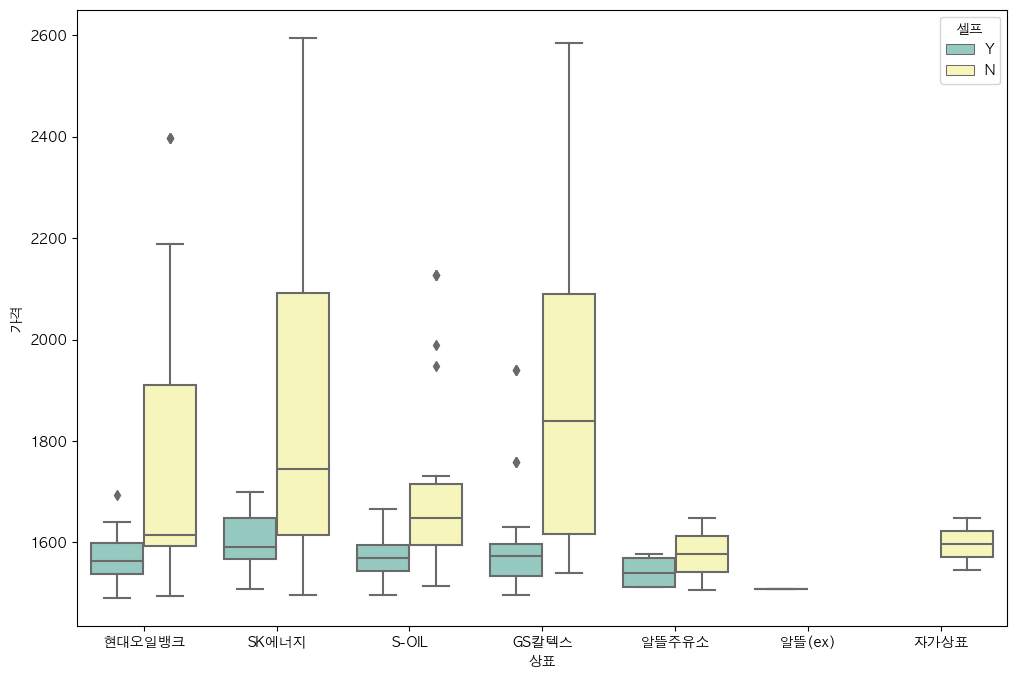

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

/Users/siina/anaconda3/envs/selenium/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


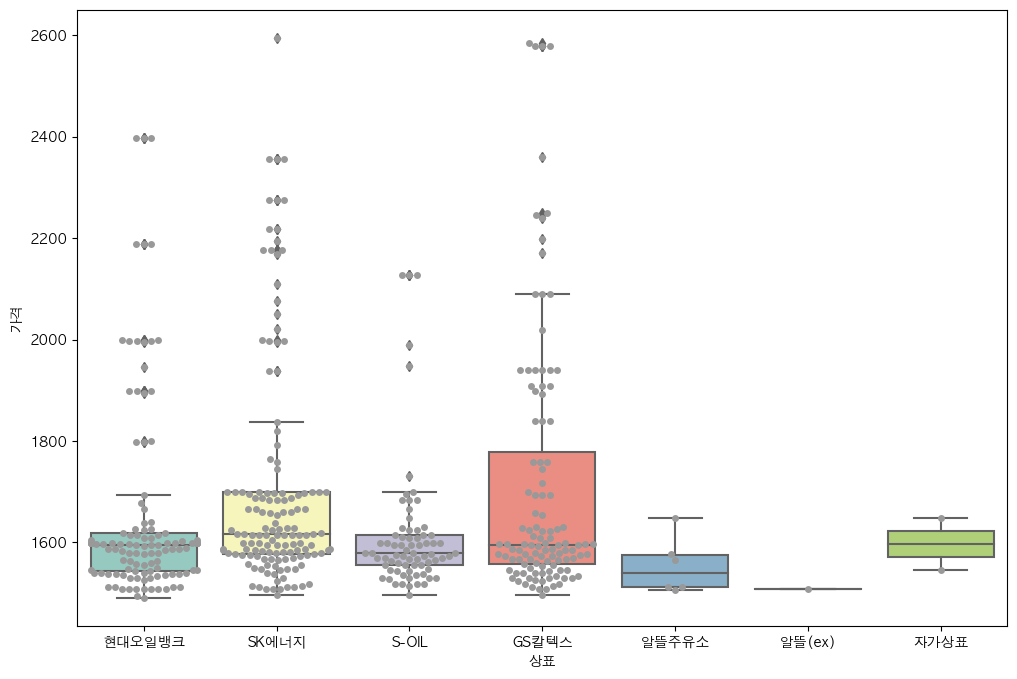

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

In [ ]:
#!pip install folium
#!pip install googlemaps

In [49]:
import json
import folium
import googlemaps
# 이제 서울시에서 가장 주유 가격이 비싼 주유소
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
155,서남주유소,서울 중구 통일로 30,2595.0,N,SK에너지,중구
219,서계주유소,서울 용산구 청파로 367 (청파동),2585.0,N,GS칼텍스,용산구
303,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
406,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
253,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
302,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
252,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
405,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
154,필동주유소,서울 중구 퇴계로 196 (필동2가),2359.0,N,GS칼텍스,중구
251,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구


In [50]:
# 서울시에서 가장 주유 가격이 싼 주유소
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
89,이케이에너지(주) 도선주유소,서울 도봉구 도봉로 941 (도봉동),1491.0,Y,현대오일뱅크,도봉구
254,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1495.0,N,현대오일뱅크,은평구
334,플라트(주)서호주유소,서울 양천구 남부순환로 317,1497.0,Y,GS칼텍스,양천구
333,현대주유소,서울 양천구 남부순환로 372 (신월동),1497.0,Y,S-OIL,양천구
332,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1497.0,N,SK에너지,양천구
172,원천주유소,서울 성북구 돌곶이로 142 (장위동),1507.0,N,알뜰주유소,성북구
49,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1509.0,Y,현대오일뱅크,강북구
59,만남의광장주유소,서울 서초구 양재대로12길 73-71,1509.0,Y,알뜰(ex),서초구
335,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1509.0,Y,SK에너지,양천구
90,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1509.0,Y,현대오일뱅크,도봉구


In [51]:
# pivot_table을 이용해서 구별 가격 정보로 변경하고 가격 평균값 정리.
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1837.647059
강동구,1652.571429
강북구,1533.333333
관악구,1616.285714
금천구,1588.454545


In [53]:
#서울시 구별 정보에 대해 지도로 표현
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, data = gu_data,
                columns=[gu_data.index, '가격'], fill_color='PuRd', #PuRd, YlGnBu
                key_on='feature.id')
map

/Users/siina/anaconda3/envs/selenium/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [54]:
# 주유 가격 상위 10개 주소 oil_price_top10 저장.
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
155,서남주유소,서울 중구 통일로 30,2595.0,N,SK에너지,중구
219,서계주유소,서울 용산구 청파로 367 (청파동),2585.0,N,GS칼텍스,용산구
303,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
406,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
253,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
302,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
252,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
405,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
154,필동주유소,서울 중구 퇴계로 196 (필동2가),2359.0,N,GS칼텍스,중구
251,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구


In [55]:
# 하위 10개 oil_price_bottom10 저장
oil_price_bottom10 = stations.sort_values(by='가격',ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
89,이케이에너지(주) 도선주유소,서울 도봉구 도봉로 941 (도봉동),1491.0,Y,현대오일뱅크,도봉구
254,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1495.0,N,현대오일뱅크,은평구
334,플라트(주)서호주유소,서울 양천구 남부순환로 317,1497.0,Y,GS칼텍스,양천구
333,현대주유소,서울 양천구 남부순환로 372 (신월동),1497.0,Y,S-OIL,양천구
332,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1497.0,N,SK에너지,양천구
172,원천주유소,서울 성북구 돌곶이로 142 (장위동),1507.0,N,알뜰주유소,성북구
49,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1509.0,Y,현대오일뱅크,강북구
59,만남의광장주유소,서울 서초구 양재대로12길 73-71,1509.0,Y,알뜰(ex),서초구
335,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1509.0,Y,SK에너지,양천구
90,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1509.0,Y,현대오일뱅크,도봉구


### google map api 이용

In [56]:
# google maps API용 개인 key 입력
gmap_key = '*********'
gmaps = googlemaps.Client(key=gmap_key)

In [57]:
from tqdm import tqdm_notebook

lat=[]
lng=[]

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])

    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')

oil_price_top10['lat']=lat
oil_price_top10['lng']=lng
oil_price_top10

/var/folders/cf/_pxyh8n15f71szpgtc0c4m6w0000gn/T/ipykernel_5366/2810043115.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
155,서남주유소,서울 중구 통일로 30,2595.0,N,SK에너지,중구,37.558375,126.972094
219,서계주유소,서울 용산구 청파로 367 (청파동),2585.0,N,GS칼텍스,용산구,37.552329,126.968946
303,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구,37.511521,127.047172
406,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구,37.511521,127.047172
253,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구,37.511521,127.047172
302,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구,37.517647,127.035735
252,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구,37.517647,127.035735
405,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구,37.517647,127.035735
154,필동주유소,서울 중구 퇴계로 196 (필동2가),2359.0,N,GS칼텍스,중구,37.560912,126.993713
251,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구,37.518637,127.028238


In [58]:
lat=[]
lng=[]
for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

/var/folders/cf/_pxyh8n15f71szpgtc0c4m6w0000gn/T/ipykernel_5366/1722742016.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
89,이케이에너지(주) 도선주유소,서울 도봉구 도봉로 941 (도봉동),1491.0,Y,현대오일뱅크,도봉구,37.688431,127.045337
254,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1495.0,N,현대오일뱅크,은평구,37.643226,126.920007
334,플라트(주)서호주유소,서울 양천구 남부순환로 317,1497.0,Y,GS칼텍스,양천구,37.538661,126.826837
333,현대주유소,서울 양천구 남부순환로 372 (신월동),1497.0,Y,S-OIL,양천구,37.533873,126.829262
332,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1497.0,N,SK에너지,양천구,37.537016,126.834285
172,원천주유소,서울 성북구 돌곶이로 142 (장위동),1507.0,N,알뜰주유소,성북구,37.614895,127.052732
49,(주)서울에너지 시민주유소,서울 강북구 인수봉로 185 (수유동),1509.0,Y,현대오일뱅크,강북구,37.636202,127.012822
59,만남의광장주유소,서울 서초구 양재대로12길 73-71,1509.0,Y,알뜰(ex),서초구,37.460084,127.042169
335,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1509.0,Y,SK에너지,양천구,37.516802,126.854664
90,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1509.0,Y,현대오일뱅크,도봉구,37.663002,127.036333


In [59]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                            radius=15, color='#CD3181', fill_color='#CD3181').add_to(map)
    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
            folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                                radius=15, color='#3186cc', fill_color='#3186cc').add_to(map)

map